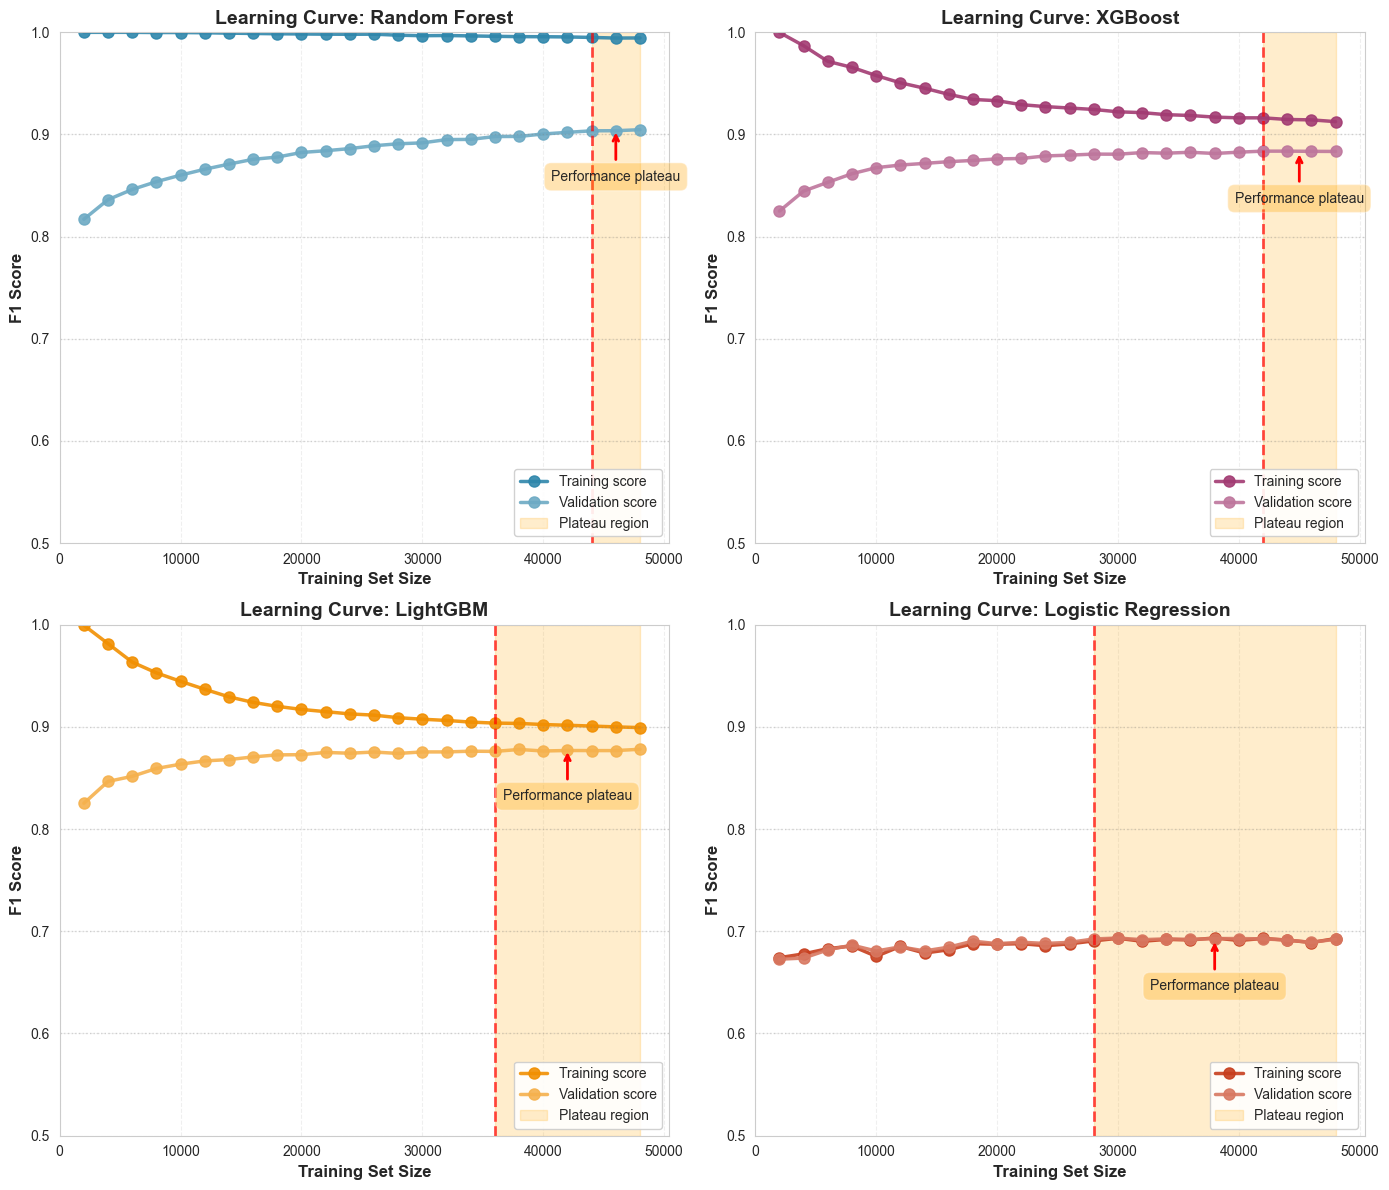


LEARNING CURVE SUMMARY

Random Forest:
  Peak F1 Score: 0.9047 at 48,000 samples
  Final F1 Score: 0.9047 at 48,000 samples
  Total Improvement: +0.0877 (+10.73%)
  Status: Plateau reached

XGBoost:
  Peak F1 Score: 0.8837 at 42,000 samples
  Final F1 Score: 0.8834 at 48,000 samples
  Total Improvement: +0.0584 (+7.08%)
  Status: Plateau reached

LightGBM:
  Peak F1 Score: 0.8782 at 48,000 samples
  Final F1 Score: 0.8782 at 48,000 samples
  Total Improvement: +0.0529 (+6.41%)
  Status: Plateau reached

Logistic Regression:
  Peak F1 Score: 0.6934 at 30,000 samples
  Final F1 Score: 0.6922 at 48,000 samples
  Total Improvement: +0.0195 (+2.90%)
  Status: Plateau reached


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 12)
plt.rcParams['font.size'] = 10

# Extract data from your output
sizes = [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 
         22000, 24000, 26000, 28000, 30000, 32000, 34000, 36000, 38000, 40000, 
         42000, 44000, 46000, 48000]

# Random Forest
rf_train = [1.0000, 1.0000, 1.0000, 0.9998, 0.9998, 0.9996, 0.9992, 0.9989, 
            0.9986, 0.9984, 0.9982, 0.9981, 0.9982, 0.9972, 0.9967, 0.9969, 
            0.9965, 0.9961, 0.9958, 0.9957, 0.9955, 0.9950, 0.9944, 0.9945]
rf_val = [0.8170, 0.8362, 0.8462, 0.8538, 0.8602, 0.8660, 0.8710, 0.8757, 
          0.8779, 0.8824, 0.8841, 0.8862, 0.8890, 0.8909, 0.8918, 0.8950, 
          0.8952, 0.8980, 0.8981, 0.9005, 0.9021, 0.9036, 0.9037, 0.9047]

# XGBoost
xgb_train = [0.9999, 0.9869, 0.9716, 0.9657, 0.9577, 0.9506, 0.9453, 0.9393, 
             0.9343, 0.9331, 0.9292, 0.9273, 0.9259, 0.9245, 0.9222, 0.9214, 
             0.9194, 0.9186, 0.9170, 0.9163, 0.9163, 0.9147, 0.9143, 0.9126]
xgb_val = [0.8250, 0.8446, 0.8532, 0.8616, 0.8675, 0.8701, 0.8717, 0.8734, 
           0.8746, 0.8761, 0.8765, 0.8790, 0.8798, 0.8808, 0.8807, 0.8823, 
           0.8817, 0.8826, 0.8814, 0.8827, 0.8837, 0.8837, 0.8835, 0.8834]

# LightGBM
lgbm_train = [0.9996, 0.9816, 0.9635, 0.9530, 0.9447, 0.9369, 0.9295, 0.9241, 
              0.9202, 0.9172, 0.9150, 0.9128, 0.9116, 0.9091, 0.9076, 0.9064, 
              0.9048, 0.9038, 0.9035, 0.9024, 0.9017, 0.9009, 0.9001, 0.8994]
lgbm_val = [0.8253, 0.8467, 0.8517, 0.8594, 0.8636, 0.8668, 0.8681, 0.8707, 
            0.8727, 0.8729, 0.8751, 0.8743, 0.8755, 0.8741, 0.8756, 0.8756, 
            0.8763, 0.8761, 0.8780, 0.8765, 0.8770, 0.8769, 0.8769, 0.8782]

# Logistic Regression
lr_train = [0.6742, 0.6779, 0.6830, 0.6856, 0.6755, 0.6852, 0.6787, 0.6819, 
            0.6879, 0.6873, 0.6879, 0.6859, 0.6877, 0.6906, 0.6932, 0.6902, 
            0.6921, 0.6915, 0.6935, 0.6910, 0.6930, 0.6914, 0.6890, 0.6929]
lr_val = [0.6727, 0.6738, 0.6818, 0.6865, 0.6807, 0.6848, 0.6808, 0.6845, 
          0.6904, 0.6879, 0.6893, 0.6881, 0.6892, 0.6925, 0.6934, 0.6918, 
          0.6926, 0.6921, 0.6929, 0.6929, 0.6926, 0.6914, 0.6892, 0.6922]

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

models = [
    ('Random Forest', rf_train, rf_val, '#2E86AB', 21),
    ('XGBoost', xgb_train, xgb_val, '#A23B72', 20),
    ('LightGBM', lgbm_train, lgbm_val, '#F18F01', 17),
    ('Logistic Regression', lr_train, lr_val, '#C73E1D', 13)
]

import matplotlib.colors as mcolors

for idx, (name, train, val, color, plateau_idx) in enumerate(models):
    ax = axes[idx]
    
    # Generate a lighter version of the base color for the validation line
    base_rgb = mcolors.to_rgb(color)
    light_rgb = tuple(min(1, c + 0.3*(1 - c)) for c in base_rgb)  # brighten color
    
    # Plot training and validation curves
    ax.plot(sizes, train, 'o-', color=color, label='Training score', 
            linewidth=2.5, markersize=8, alpha=0.9)
    ax.plot(sizes, val, 'o-', color=light_rgb, label='Validation score', 
            linewidth=2.5, markersize=8, alpha=0.9)
    
    # Add plateau region
    plateau_start = sizes[plateau_idx]
    ax.axvspan(plateau_start, sizes[-1], alpha=0.2, color='orange',
               label=f'Plateau region')
    ax.axvline(plateau_start, color='red', linestyle='--', linewidth=2, alpha=0.7)
    
    # Add annotation for plateau
    mid_plateau = (plateau_start + sizes[-1]) / 2
    ax.annotate('Performance plateau',
                xy=(mid_plateau, val[-1]),
                xytext=(mid_plateau, val[-1] - 0.05),
                ha='center',
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='orange', alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0',
                               color='red', lw=2))
    
    # Formatting
    ax.set_xlabel('Training Set Size', fontsize=12, fontweight='bold')
    ax.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
    ax.set_title(f'Learning Curve: {name}', fontsize=14, fontweight='bold')
    ax.legend(loc='lower right', fontsize=10, framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_ylim([0.5, 1.0])
    ax.axhline(y=0.6, color='gray', linestyle=':', alpha=0.3, linewidth=1)
    ax.axhline(y=0.7, color='gray', linestyle=':', alpha=0.3, linewidth=1)
    ax.axhline(y=0.8, color='gray', linestyle=':', alpha=0.3, linewidth=1)
    ax.axhline(y=0.9, color='gray', linestyle=':', alpha=0.3, linewidth=1)
    ax.set_xlim([0, sizes[-1] * 1.05])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("LEARNING CURVE SUMMARY")
print("="*80)
for name, train, val, _, _ in models:
    peak_val = max(val)
    peak_idx = val.index(peak_val)
    total_improvement = val[-1] - val[0]
    
    print(f"\n{name}:")
    print(f"  Peak F1 Score: {peak_val:.4f} at {sizes[peak_idx]:,} samples")
    print(f"  Final F1 Score: {val[-1]:.4f} at {sizes[-1]:,} samples")
    print(f"  Total Improvement: {total_improvement:+.4f} ({total_improvement/val[0]*100:+.2f}%)")
    print(f"  Status: Plateau reached")